<h1 align = "Center"> IST 5520 Spring 2020: Group 1 Project Proposal </h1>
<h2 align = "Center"> An Analysis of Vermont Crashes Data</h2>
<h3 align = "Center"> By: Bryce Cordry, Kyle Johnson, Matthew Kovar, Yitian Luo, Brian Middleton </h3>

# Introduction

Traffic crashes happen every day in the world and they rank as the 9th leading cause of death. In the United States, there are an average of 16,438 car accidents per day. Moreover, nearly 1.25 million people die in car accidents per year, by this we mean that, car accidents cause 3,287 deaths per day. （https://www.thewanderingrv.com/car-accident-statistics/) Therefore, it is important for us to get more information about car crashes and try to avoid them.

We found a dataset of car crashes in the State of Vermont from the year 2014 to 2018. We are considering the dataset from the perspective of an insurance company using telematics devices in vehicles to create individualized risk profiles for policyholders located in Vermont and set their premiums accordingly. We are interested in determining what kinds of characteristics are responsible for vehicle accidents and how to use this information to adjust a policyholder's future premium once they are in an accident. To be more specific, we want to figure out what matters the most in the accidents. Also, we hope to find out factors that lead to various outcomes (property damage, injury or fatal). In addition, we want to find out areas or roads that are most prone to accidents.

# Data Source and Collection

The dataset was downloaded from the Vermont Open Geodata Portal (https://geodata.vermont.gov/datasets/VTrans::vt-crashes-2018?orderBy=ACCIDENTDATE&orderByAsc=false). 
We combined the data from year 2014 to year 2018 and it contains 61,562 car accidents in Vermont. The data was collected by various reporting agencies within Vermont. 

This dataset contains 36 columns listed below. Some of the key information includes the type of injury, the impairment of the driver, the accident location, date, weather, the road conditions, as well as the reporting agency. All of this information can be useful for us in determining how the insured's future premiums will be adjusted.
 

- 	OBJECTID 
-   REPORTINGAGENCYid 
- 	ReportingAgency 
- 	REPORTNUMBER 
- 	ACCIDENTDATE 
- 	STREETADDRESS 
- 	INTERSECTIONWITH 
- 	DirOfCollision 
- 	RoadGroup 
- 	AOTACTUALMILEPOINT 
- 	RoadCharacteristics 
- 	NonReportableAddress 
- 	CITYORTOWNid 
- 	CITYORTOWN 
- 	EASTING 
- 	NORTHING
- 	AOTROUTEid 
-	AOTROUTE 
-	LRSNUMBER 
-	HOWMAPPED 
-	Animal 
-	Impairment 
-	Involving 
-	Weather 
-	DayNight 
-	InjuryType 
-	LOC_ERROR 
-	RDFLNAME 
-	SurfaceCondition 
-	RoadCondition 
-	Route 
-	LATITUDE 
-	LONGITUDE 
-	AOTROADWAYGROUPid 


# Technical Approach

### Data Manipulation

Use Pandas/Numpy/Scipy for datasets manipulation.

In [29]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import and clean data, deal with missing values
years = [2015, 2016, 2017, 2018]
df_dict = {year:pd.read_csv("VT_Crashes__{}.csv".format(str(year))) for year in years}

for year, df in df_dict.items():
  df_dict[year] = df.rename(columns={"ACCIDENTDA":"ACCIDENTDATE", 
                                     "AOTACTUALM":"AOTACTUALMILEPOINT",
                                     "INTERSECTI":"INTERSECTIONWITH",
                                     "STREETADDR":"STREETADDRESS",
                                     "REPORTNUMB":"REPORTNUMBER",
                                     "ReportingAgency":"REPORTINGAGENCY",
                                     "DirOfCollision":"DIROFCOLLI",
                                     "VCSG_LRSNUMBER":"LRSNUMBER",
                                     "REPORTINGA":"REPORTINGAGENCYid",
                                     "VCSG_EASTING":"EASTING",
                                     "VCSG_NORTHING":"NORTHING",
                                     "VCSG_AOTROUTE":"AOTROUTE",
                                     "VCSG_CITYORTOWN":"CITYORTOWN"})
  df_dict[year]["Year"] = year

df_dict[2018] = df_dict[2018].rename(columns={"LATITUDE":"LAT_DD","LONGITUDE":"LONG_DD"})
df_dict[2017] = df_dict[2017].rename(columns={"GIS_LATITUDE":"LAT_DD","GIS_LONGITUDE":"LONG_DD"})

df = pd.concat(df_dict.values(), sort=True)

df = df.drop(columns=['ACCIDENTTI','AOTROADWAYGROUPid','AOTROUTEid','CITYORTOWNid','MILEMARKER1','MILEMARKER_1',
                      'MILEMARKER_2','NUMBER','NUMBER1','NUMBER2','NUMBER3','OBJECTID','RDFLNAME','REPORTINGAGENCYid',
                      'VCSG_AOTROUTEid','VCSG_CITYORTOWNid','NORTHING','EASTING','DIRFROMNEA','CrashType',
                     'DISTANCE_1','POSTEDSPEE','VCSG_LATITUDE','VCSG_LONGITUDE','Route', 'AOTROADWAY'])

df['AOTACTUALMILEPOINT'] = df['AOTACTUALMILEPOINT'].fillna("Unmarked")
df['AOTROUTE'] = df['AOTROUTE'].fillna("Unknown")
df['Animal'] = df['Animal'].fillna("None/Other")
df['CITYORTOWN'] = df['CITYORTOWN'].fillna("Unknown")
df['DIROFCOLLI'] = df['DIROFCOLLI'].fillna("Unknown")
df['INTERSECTIONWITH'] = df['INTERSECTIONWITH'].fillna("Unknown")
df['Impairment'] = df['Impairment'].fillna("None")
df['Involving'] = df['Involving'].fillna("None")
df['LOCALID'] = df['LOCALID'].fillna("Unknown")
df['LOC_ERROR'] =df['LOC_ERROR'].fillna("NO ERROR")
df['LRSNUMBER'] = df['LRSNUMBER'].fillna("None")
df['NonReportableAddress'] = df['NonReportableAddress'].fillna("Reportable")
df['RoadCharacteristics'] = df['RoadCharacteristics'].fillna("Other - Explain in Narrative")
df['Weather'] = df['Weather'].fillna("Unknown")
df['STREETADDRESS'] = df['STREETADDRESS'].fillna("Unknown")

values_dist = df.DayNight.value_counts(normalize=True)
missing = df['DayNight'].isnull()
df.loc[missing,'DayNight'] = np.random.choice(values_dist.index, size=len(df[missing]),p=values_dist.values)

values_dist = df.InjuryType.value_counts(normalize=True)
missing = df['InjuryType'].isnull()
df.loc[missing,'InjuryType'] = np.random.choice(values_dist.index, size=len(df[missing]),p=values_dist.values)

Freezing_Precipitation_df = df[(df['SurfaceCondition'].isin(['Snow','Ice','Slush','Wet']))]
values_dist = Freezing_Precipitation_df.SurfaceCondition.value_counts(normalize=True)
df['SurfaceCondition'] = np.where(((df.SurfaceCondition.isnull())& (df['Weather'] == 'Rain')),'Wet',df.SurfaceCondition)
df['SurfaceCondition'] = np.where(((df.SurfaceCondition.isnull())& (df['Weather'] == 'Clear')),'Dry',df.SurfaceCondition)
df['SurfaceCondition'] = np.where(((df.SurfaceCondition.isnull())& (df['Weather'] == 'Freezing Precipitation')),np.random.choice(values_dist.index,p=values_dist.values),df.SurfaceCondition)
df['RoadCondition'] = np.where(((df.RoadCondition.isnull())& (df['Weather'] == 'Freezing Precipitation')),'Road Surface Condition(wet, icy, snow, slush, etc)',df.RoadCondition)
df['RoadCondition'] = np.where(((df.RoadCondition.isnull())& (df['Weather'] == 'Rain')),'Road Surface Condition(wet, icy, snow, slush, etc)',df.RoadCondition)

values_dist = df.SurfaceCondition.value_counts(normalize=True)
missing = df['SurfaceCondition'].isnull()
df.loc[missing,'SurfaceCondition'] = np.random.choice(values_dist.index, size=len(df[missing]),p=values_dist.values)

values_dist = df.RoadCondition.value_counts(normalize=True)
missing = df['RoadCondition'].isnull()
df.loc[missing,'RoadCondition'] = np.random.choice(values_dist.index, size=len(df[missing]),p=values_dist.values)

df = df.dropna()

df = df.astype(str)

df.reset_index(drop = True, inplace = True)

from datetime import datetime
from dateutil import parser
for i in range(len(df)):
    x = parser.isoparse(df['ACCIDENTDATE'][i])
    x = x.strftime('%Y-%m-%d %H:%M:%S')
    df['ACCIDENTDATE'][i] = x
    
df['ACCIDENTDATE'] = pd.to_datetime(df['ACCIDENTDATE'])    

nullCount = df.isna().sum()
nullCount.to_csv("nullCount.csv")
print(type(nullCount))
df.to_csv("combined.csv")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:94: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


<class 'pandas.core.series.Series'>


### Data Analysis

Analyze the different accidents type under different conditions. Data visualization including hot map of the areas that car crashes happened in Vermont and the histogram of the accidents under different situations.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23735 entries, 0 to 23734
Data columns (total 29 columns):
ACCIDENTDATE            23735 non-null datetime64[ns]
AOTACTUALMILEPOINT      23735 non-null object
AOTROUTE                23735 non-null object
Animal                  23735 non-null object
CITYORTOWN              23735 non-null object
DIROFCOLLI              23735 non-null object
DayNight                23735 non-null object
HOWMAPPED               23735 non-null object
INTERSECTIONWITH        23735 non-null object
Impairment              23735 non-null object
InjuryType              23735 non-null object
Involving               23735 non-null object
LAT_DD                  23735 non-null object
LOCALID                 23735 non-null object
LOC_ERROR               23735 non-null object
LONG_DD                 23735 non-null object
LRSNUMBER               23735 non-null object
NonReportableAddress    23735 non-null object
REPORTINGAGENCY         23735 non-null object
REPORTNUM

In [31]:
# Get the descriptive summary
df.describe().transpose()

,count,unique,top,freq,first,last
ACCIDENTDATE,23735,23195,2017-03-10 00:00:00,4,2016-01-06 10:17:00,2018-12-31 17:44:00
AOTACTUALMILEPOINT,23735,1774,999.99,7922,NaT,NaT
AOTROUTE,23735,1631,Unknown,2640,NaT,NaT
Animal,23735,5,None/Other,23114,NaT,NaT
CITYORTOWN,23735,253,Burlington,3000,NaT,NaT
DIROFCOLLI,23735,23,Unknown,6069,NaT,NaT
DayNight,23735,2,Day,17904,NaT,NaT
HOWMAPPED,23735,4,LRS,15777,NaT,NaT
INTERSECTIONWITH,23735,10553,Unknown,4210,NaT,NaT
Impairment,23735,4,None,22710,NaT,NaT


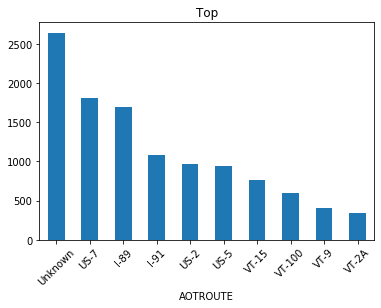

In [32]:
AOTR=pd.crosstab(index=df['AOTROUTE'],columns="Count")
AOTR=AOTR.sort_values(by='Count',ascending=False).head(10)
AOTR.plot(kind='bar', legend = False)
plt.title('Top 10 Accident Route')
plt.xticks(rotation=45)
plt.show()

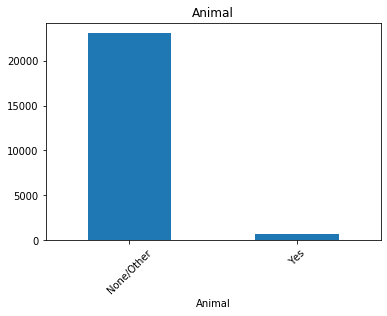

In [36]:
df['Animal'] = np.where((df['Animal'] == 'Deer'),'Yes',df.Animal)
df['Animal'] = np.where((df['Animal'] == 'Domestic'),'Yes',df.Animal)
df['Animal'] = np.where((df['Animal'] == 'Moose'),'Yes',df.Animal)
df['Animal'] = np.where((df['Animal'] == 'Wild'),'Yes',df.Animal)
Ani=pd.crosstab(index=df['Animal'],columns="Count")
Ani=Ani.sort_values(by='Count',ascending=False)
Ani.plot(kind='bar', legend = False)
plt.title('Animal')
plt.xticks(rotation=45)
plt.show()

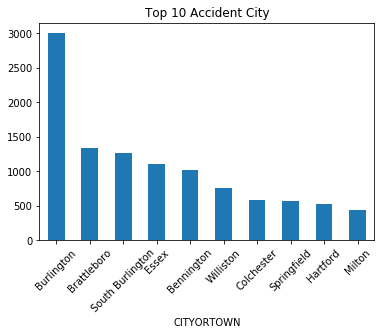

In [39]:
CITY=pd.crosstab(index=df['CITYORTOWN'],columns="Count")
CITY=CITY.sort_values(by='Count',ascending=False).head(10)
CITY.plot(kind='bar', legend = False)
plt.title('Top 10 Accident City')
plt.xticks(rotation=45)
plt.show()

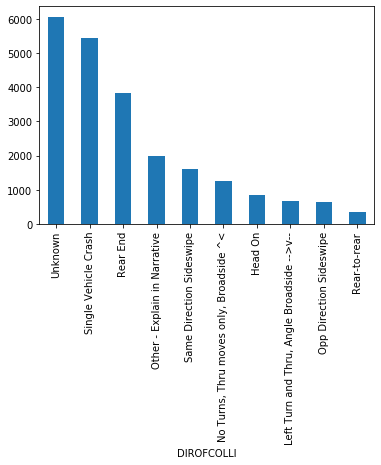

In [70]:
DIRE=pd.crosstab(index=df['DIROFCOLLI'],columns="Count")
DIRE=DIRE.sort_values(by='Count',ascending=False).head(10)
DIRE.plot(kind='bar', legend = False)
plt.title('Top 10 Direction of Collision')
plt.show()

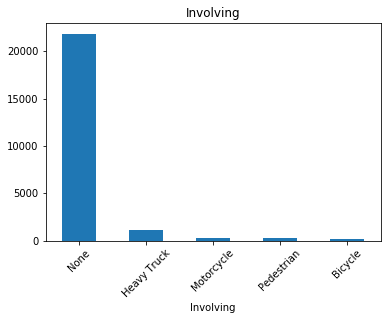

In [65]:
Inv=pd.crosstab(index=df['Involving'], columns="Count")
Inv=Inv.sort_values(by='Count',ascending=False)
Inv.plot(kind='bar', legend = False)
plt.title('Involving')
plt.xticks(rotation=45)
plt.show()

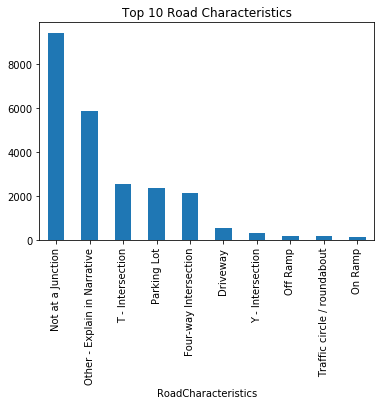

In [71]:
RoadChar=pd.crosstab(index=df['RoadCharacteristics'],columns="Count")
RoadChar=RoadChar.sort_values(by='Count', ascending=False).head(10)
RoadChar.plot(kind='bar', legend = False)
plt.title('Top 10 Road Characteristics')
plt.show()

In [14]:
# Contigency tables
pd.crosstab(df['InjuryType'],df['Weather'], margins=True)

Weather,Clear,Cloudy,Freezing Precipitation,Rain,Unknown,Wind,All
InjuryType,,,,,,,
Fatal,75,24,10,8,28,0,145
Injury,2094,811,457,301,876,10,4549
Property Damage Only,7582,2889,1999,996,5535,40,19041
All,9751,3724,2466,1305,6439,50,23735


In [21]:
pd.crosstab(df['InjuryType'],df['DayNight'], margins=True)

DayNight,Day,Night,All
InjuryType,,,
Fatal,94,51,145
Injury,3300,1249,4549
Property Damage Only,14515,4526,19041
All,17909,5826,23735


In [17]:
pd.crosstab( df['SurfaceCondition'], df['Weather'], margins=True)

Weather,Clear,Cloudy,Freezing Precipitation,Rain,Unknown,Wind,All
SurfaceCondition,,,,,,,
Dry,8579,2265,19,18,4214,9,15104
Ice,246,182,374,27,238,4,1071
Not Reported,9,2,0,0,20,0,31
Other - Explain in Narrative,28,14,10,2,36,1,91
"Sand, mud, dirt, oil, gravel",56,33,2,14,38,0,143
Slush,65,69,164,11,81,0,390
Snow,265,296,1722,8,716,30,3037
Unknown,49,25,8,4,264,0,350
Water (standing / moving),1,0,3,45,9,0,58


In [20]:
pd.crosstab(df['DIROFCOLLI'],df['Weather'], margins=True)

Weather,Clear,Cloudy,Freezing Precipitation,Rain,Unknown,Wind,All
DIROFCOLLI,,,,,,,
Head On,410,146,183,55,32,5,831
"Left Turn and Thru, Angle Broadside -->v--",432,137,41,48,21,0,679
"Left Turn and Thru, Broadside v<--",205,67,27,25,10,1,335
"Left Turn and Thru, Head On ^v--",70,25,6,6,3,0,110
"Left Turn and Thru, Same Direction Sideswipe/Angle Crash vv--",83,35,9,6,3,0,136
"Left Turns, Opposite Directions, Head On/Angle Crash --^v--",18,6,0,4,0,0,28
"Left Turns, Same Direciton, Rear End v--v--",9,2,1,2,0,0,14
"Left Turns, Same Direction, Rear End v--v--",11,4,2,1,0,0,18
"Left and Right Turns, Simultaneous Turn Crash --vv--",24,7,4,3,1,0,39


In [18]:
# Encoding categorical variables --- not sure if it's the correct way though. plase change it if you think it's not suitable!
fe=df.groupby('AOTROUTE').size()/len(df)
df.loc[:, 'AOTROUTE_freq_encode'] = df['AOTROUTE'].map(fe)

fe1=df.groupby('Animal').size()/len(df)
df.loc[:, 'Animal_freq_encode'] = df['Animal'].map(fe1)

fe2=df.groupby('CITYORTOWN').size()/len(df)
df.loc[:, 'CITYORTOWN_freq_encode'] = df['CITYORTOWN'].map(fe2)

fe3=df.groupby('DIROFCOLLI').size()/len(df)
df.loc[:, 'DIROFCOLLI_freq_encode'] = df['DIROFCOLLI'].map(fe3)

fe4=df.groupby('DayNight').size()/len(df)
df.loc[:, 'DayNight_freq_encode'] = df['DayNight'].map(fe4)

fe5=df.groupby('HOWMAPPED').size()/len(df)
df.loc[:, 'HOWMAPPED_freq_encode'] = df['HOWMAPPED'].map(fe5)

fe6=df.groupby('INTERSECTIONWITH').size()/len(df)
df.loc[:, 'INTERSECTIONWITH_freq_encode'] = df['INTERSECTIONWITH'].map(fe6)

fe7=df.groupby('Impairment').size()/len(df)
df.loc[:, 'Impairment_freq_encode'] = df['Impairment'].map(fe7)

fe8=df.groupby('InjuryType').size()/len(df)
df.loc[:, 'InjuryType_freq_encode'] = df['InjuryType'].map(fe8)

fe9=df.groupby('Involving').size()/len(df)
df.loc[:, 'Involving_freq_encode'] = df['Involving'].map(fe9)

fe10=df.groupby('LOC_ERROR').size()/len(df)
df.loc[:, 'LOC_ERROR_freq_encode'] = df['LOC_ERROR'].map(fe10)

fe11=df.groupby('NonReportableAddress').size()/len(df)
df.loc[:, 'NonReportableAddress_freq_encode'] = df['NonReportableAddress'].map(fe11)

fe12=df.groupby('REPORTINGAGENCY').size()/len(df)
df.loc[:, 'REPORTINGAGENCY_freq_encode'] = df['REPORTINGAGENCY'].map(fe12)

fe13=df.groupby('REPORTNUMBER').size()/len(df)
df.loc[:, 'REPORTNUMBER_freq_encode'] = df['REPORTNUMBER'].map(fe13)

fe14=df.groupby('RoadCharacteristics').size()/len(df)
df.loc[:, 'RoadCharacteristics_freq_encode'] = df['RoadCharacteristics'].map(fe14)

fe15=df.groupby('RoadCondition').size()/len(df)
df.loc[:, 'RoadCondition_freq_encode'] = df['RoadCondition'].map(fe15)

fe16=df.groupby('RoadGroup').size()/len(df)
df.loc[:, 'RoadGroup_freq_encode'] = df['RoadGroup'].map(fe16)

fe17=df.groupby('STREETADDRESS').size()/len(df)
df.loc[:, 'STREETADDRESS_freq_encode'] = df['STREETADDRESS'].map(fe17)

fe18=df.groupby('SurfaceCondition').size()/len(df)
df.loc[:, 'SurfaceCondition_freq_encode'] = df['SurfaceCondition'].map(fe18)

fe19=df.groupby('Weather').size()/len(df)
df.loc[:, 'Weather_freq_encode'] = df['Weather'].map(fe19)

df.head()

,ACCIDENTDATE,AOTACTUALMILEPOINT,AOTROUTE,Animal,CITYORTOWN,DIROFCOLLI,DayNight,HOWMAPPED,INTERSECTIONWITH,Impairment,...,LOC_ERROR_freq_encode,NonReportableAddress_freq_encode,REPORTINGAGENCY_freq_encode,REPORTNUMBER_freq_encode,RoadCharacteristics_freq_encode,RoadCondition_freq_encode,RoadGroup_freq_encode,STREETADDRESS_freq_encode,SurfaceCondition_freq_encode,Weather_freq_encode
60,2016-12-14T08:47:00.000Z,1.41,US-7,None/Other,South Burlington,Rear End,Day,LRS,Laurel Hill Dr,None,...,0.664715,0.866189,0.047946,0.000042,0.396967,0.729724,0.412471,0.000084,0.636360,0.410828
61,2016-12-13T07:30:00.000Z,70.1,I-89,None/Other,Bolton,Same Direction Sideswipe,Day,LRS,Approximately 11 Miles South Of Exit 11,None,...,0.664715,0.866189,0.057089,0.000042,0.396967,0.729724,0.412471,0.000463,0.045123,0.103897
62,2016-12-13T01:58:00.000Z,1.48,I-189,None/Other,South Burlington,Other - Explain in Narrative,Night,LRS,Interstate 89 North/Dorset Ramp,None,...,0.664715,0.866189,0.047946,0.000042,0.007668,0.223678,0.412471,0.000042,0.127954,0.103897
63,2016-12-13T07:55:00.000Z,3.13,VT-116,None/Other,South Burlington,Rear End,Day,LRS,Unknown,None,...,0.664715,0.866189,0.047946,0.000042,0.396967,0.223678,0.412471,0.000042,0.016431,0.410828
64,2016-12-05T08:00:00.000Z,0.42,VT-128,None/Other,Essex,Single Vehicle Crash,Day,LRS,MARION AVE,None,...,0.664715,0.866189,0.046471,0.000042,0.396967,0.223678,0.412471,0.000042,0.127954,0.103897


### Machine Learning

Conduct the regression and time series analysis to provide the future prediction for the premiums.

# Business Questions

After understanding where the data comes from and what it includes, we are able to simplify our business questions down to the following: 

1. Which factors cause accidents?
2. Which factors best determine the outcome of an accident
3. Which roads are most prone to accidents, and how can we improve them?